Dataset Setup & Visualization

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/document-forgery-detection/my_dataset

!ls


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/document-forgery-detection/my_dataset
test  test.csv	test.txt  train  train.csv  train.txt  val  val.csv  val.txt


In [ ]:
!pip install albumentations opencv-python pandas matplotlib


In [ ]:
#Step 3: Convert Original Dataset to Clean CSVs
import pandas as pd

def convert_to_csv(split_name):
    df = pd.read_csv(f"{split_name}.txt")  # even though extension is .txt, it's CSV format
    clean_df = pd.DataFrame({
        "image_path": f"{split_name}/" + df["image"],
        "label": df["forged"].astype(int)
    })
    clean_df.to_csv(f"{split_name}.csv", index=False)
    print(f" {split_name}.csv created: {len(clean_df)} samples")
    print("Class balance:\n", clean_df["label"].value_counts())
    return clean_df

train_df = convert_to_csv("train")
val_df   = convert_to_csv("val")
test_df  = convert_to_csv("test")


✅ train.csv created: 577 samples
Class balance:
 label
0    483
1     94
Name: count, dtype: int64
✅ val.csv created: 193 samples
Class balance:
 label
0    159
1     34
Name: count, dtype: int64
✅ test.csv created: 218 samples
Class balance:
 label
0    183
1     35
Name: count, dtype: int64


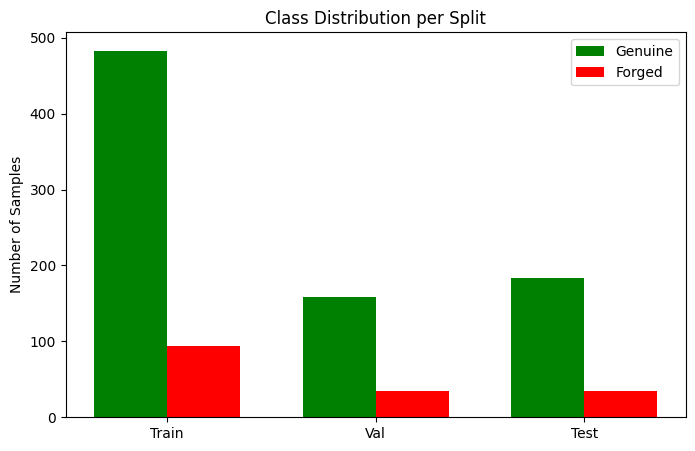

In [ ]:
#Step 4: Check Class Distribution
import matplotlib.pyplot as plt
import numpy as np

def get_counts(df):
    return df['label'].value_counts().get(0, 0), df['label'].value_counts().get(1, 0)

splits = {'Train': train_df, 'Val': val_df, 'Test': test_df}
genuine_counts, forged_counts = [], []

for _, df in splits.items():
    g, f = get_counts(df)
    genuine_counts.append(g)
    forged_counts.append(f)

x = np.arange(len(splits))
width = 0.35
plt.figure(figsize=(8, 5))
plt.bar(x - width/2, genuine_counts, width, label='Genuine', color='green')
plt.bar(x + width/2, forged_counts, width, label='Forged', color='red')
plt.xticks(x, splits.keys())
plt.ylabel("Number of Samples")
plt.title("Class Distribution per Split")
plt.legend()
plt.show()


Showing a forged sample from TRAIN set.


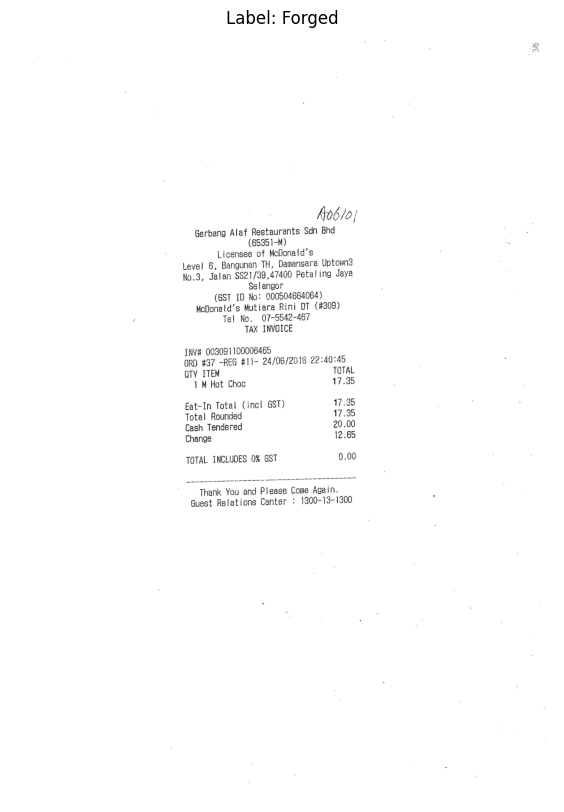

In [ ]:
#Step 5: Visualize a Random Forged or Genuine Receipt
import cv2, json, random
import matplotlib.pyplot as plt

if (train_df['label']==1).sum() > 0:
    sample = train_df[train_df['label']==1].sample(1).iloc[0]
    print("Showing a forged sample from TRAIN set.")
elif (val_df['label']==1).sum() > 0:
    sample = val_df[val_df['label']==1].sample(1).iloc[0]
    print("Showing a forged sample from VAL set.")
elif (test_df['label']==1).sum() > 0:
    sample = test_df[test_df['label']==1].sample(1).iloc[0]
    print("Showing a forged sample from TEST set.")
else:
    print("⚠ No forged samples found — showing a random sample from train set.")
    sample = train_df.sample(1).iloc[0]

img_path = sample['image_path']
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.title(f"Label: {'Forged' if sample['label']==1 else 'Genuine'}")
plt.axis("off")
plt.show()
